# User advertisement click predicton

#### data is of two types- continous(eg. age, name, basically that keeps on changing from person to change) and the other is categorical (eg. survival, gender, pclass basically that only has particular values)

### continous data- best visualization is histogram and categorical data- best visualization is bar chart

In [1]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0


### Plotting a histogram

In [4]:
sb.set()

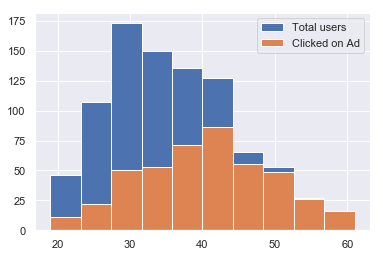

In [5]:
mpt.hist(data['Age'], label='Total users')
mpt.hist(data['Age'][data['Clicked on Ad']==1], label='Clicked on Ad')
mpt.legend()

## 100% stacked bar chart of gender and clicks

In [6]:
new_data = pd.crosstab(data['Male'], data['Clicked on Ad'])

In [7]:
new_data

Clicked on Ad,0,1
Male,,
0,229,236
1,232,203


In [8]:
new_data['total']=new_data.sum(axis=1)

In [9]:
new_data

Clicked on Ad,0,1,total
Male,,,
0,229,236,465
1,232,203,435


In [10]:
new_data=new_data.apply(lambda x: round(100*x/new_data['total']))

In [11]:
new_data

Clicked on Ad,0,1,total
Male,,,
0,49.0,51.0,100.0
1,53.0,47.0,100.0


In [12]:
new_data.drop('total', axis=1, inplace=True)

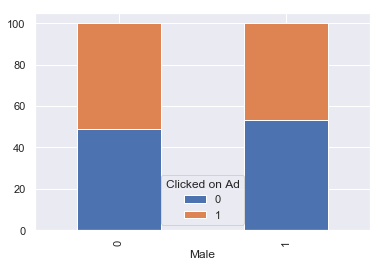

In [13]:
new_data.plot(kind='bar', stacked='True')

In [14]:
training_data = data[['Male', 'Age']]
output_data = data['Clicked on Ad']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X, x_text, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42) 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X,Y)              

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predictions = model.predict(x_text)

In [21]:
predictions[:10]

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
confusion_matrix(predictions, y_test)               

array([[106,  48],
       [ 25,  91]], dtype=int64)

In [24]:
score = accuracy_score(predictions, y_test)
score                                       

0.7296296296296296

### visualization for country and clicked on ads

In [25]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [26]:
new_data2 = pd.crosstab(data['Country'], data['Clicked on Ad'], margins=True, margins_name='Total')
new_data2.head()

Clicked on Ad,0,1,Total
Country,,,
Afghanistan,2,5,7
Albania,3,3,6
Algeria,3,3,6
American Samoa,2,3,5
Andorra,0,2,2


In [27]:
new_data2.head(2)

Clicked on Ad,0,1,Total
Country,,,
Afghanistan,2,5,7
Albania,3,3,6


In [28]:
new_data2.columns

Index([0, 1, 'Total'], dtype='object', name='Clicked on Ad')

In [29]:
new_data2.shape

(235, 3)

In [30]:
for i in range(236):
    a=(new_data2.iloc[:i, 1:2])
    b=(new_data2.iloc[:i, 2:3])
new_data2['ratio'] = round(100*(a[1]/b['Total']))

In [31]:
new_data2.sort_values(by=['ratio'], ascending=False).head()

Clicked on Ad,0,1,Total,ratio
Country,,,,
Kiribati,0,1,1,100.0
Guatemala,0,3,3,100.0
Sierra Leone,0,2,2,100.0
Saint Barthelemy,0,1,1,100.0
Spain,0,3,3,100.0


## Visualization based on daily internet usage

In [32]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


### Making a histogram

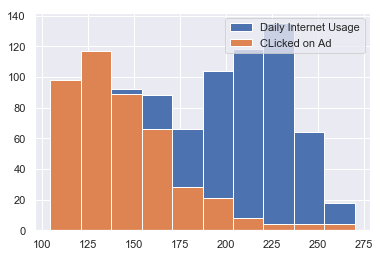

In [33]:
mpt.hist(data['Daily Internet Usage'], label='Daily Internet Usage')
mpt.hist(data['Daily Internet Usage'][data['Clicked on Ad']==1], label='CLicked on Ad')
mpt.legend()

### Making a scatter plot

In [34]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [36]:
# mpt.scatter(x=data['Daily Internet Usage'], y=data['Clicked on Ad'])
# mpt.show()

In [37]:
new_data4=pd.crosstab(data['Daily Internet Usage'], data['Clicked on Ad'])

In [39]:
new_data4.head()

Clicked on Ad,0,1
Daily Internet Usage,,
104.78,0,1
105.00,0,1
105.15,0,1
105.22,0,1
105.69,0,1


In [40]:
new_data4.columns

Int64Index([0, 1], dtype='int64', name='Clicked on Ad')

In [52]:
[new_data4[1], new_data4[2]]

KeyError: 2

In [48]:
mpt.scatter(x=new_data4.index, y=new_data4[[]]

Float64Index([104.78,  105.0, 105.15, 105.22, 105.69, 105.71, 105.86, 105.94,
              106.04, 106.86,
              ...
              255.61, 256.09,  256.4, 258.06, 258.62, 259.76, 261.02, 261.52,
              267.01, 269.96],
             dtype='float64', name='Daily Internet Usage', length=870)